In [4]:
# Importing the libraries
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats

# Importing various machine learning algorithm from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,roc_curve,auc,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("C:/ClassesMSC/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# duplication check
len(df)-len(df.drop_duplicates())

1

In [8]:
# dropping null values 

df.dropna(inplace=True)

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='age'>

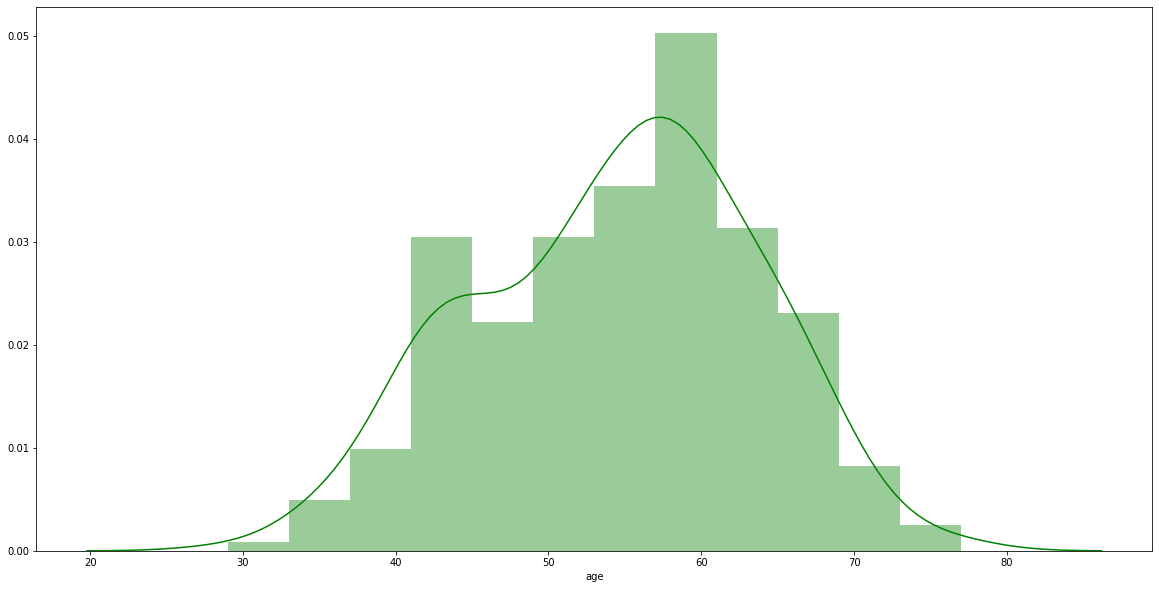

In [11]:
ax = plt.figure(figsize =(20,10))
sns.distplot(df['age'],color = 'green')

#### Highest number of patients were aged between 55-60

<AxesSubplot:xlabel='sex', ylabel='count'>

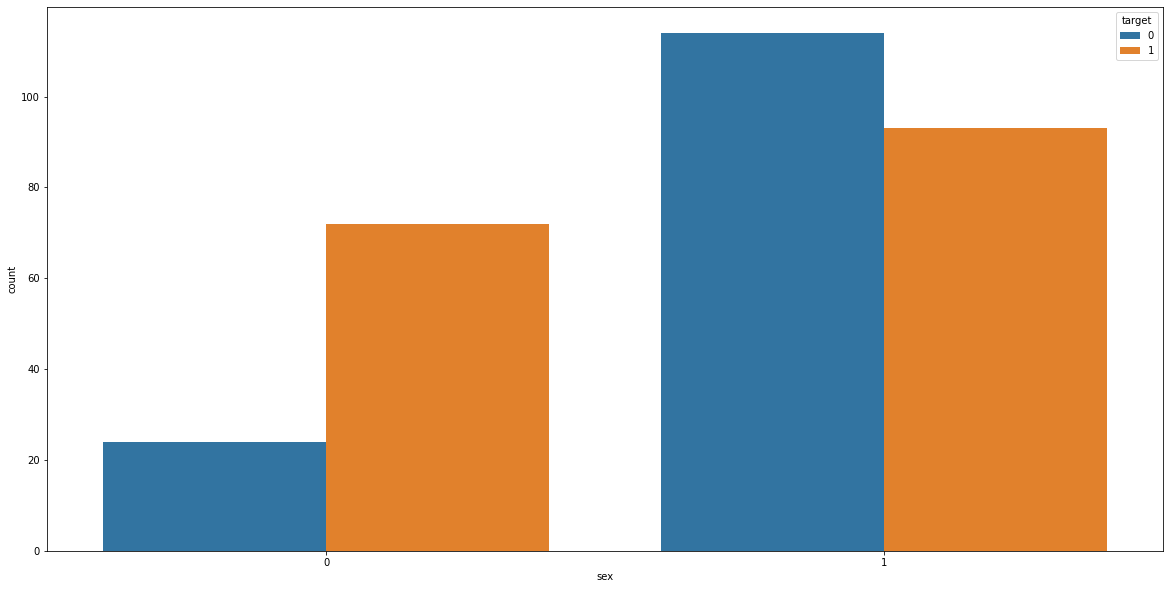

In [12]:
# Between sex and the chances

plt.figure(figsize=[20, 10])
sns.countplot(x='sex', data=df , hue= 'target')

#### It's a little bit difficult to imagine which two groups are at an advantage just by looking at their ages and outcomes.

<AxesSubplot:xlabel='sex', ylabel='count'>

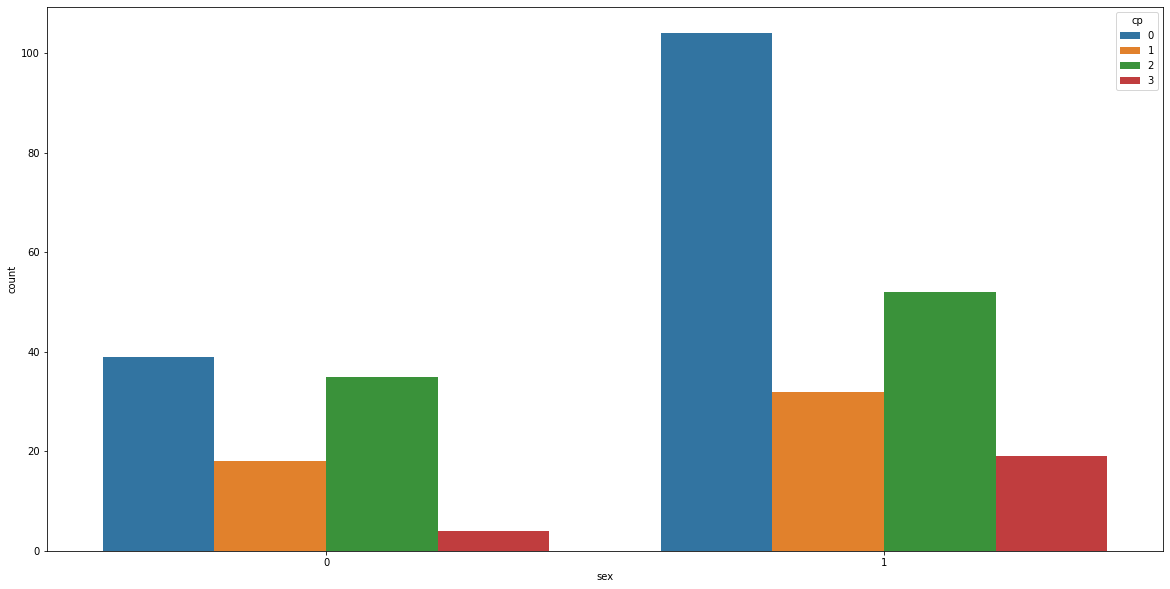

In [13]:
# Between chest pain and sex

plt.figure(figsize=[20, 10])
sns.countplot(x='sex', data=df, hue='cp')

#### Chest pain type 0 is most common in both the genders.

<AxesSubplot:xlabel='sex', ylabel='count'>

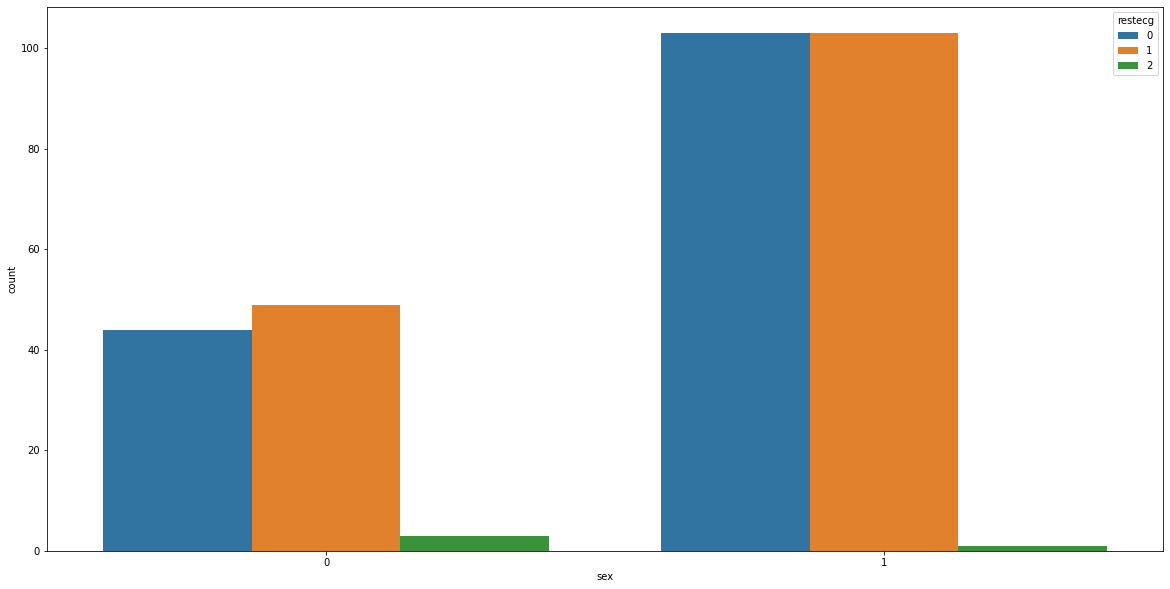

In [10]:
# Between age and restecg

plt.figure(figsize=[20, 10])
sns.countplot(x='sex', data=df, hue='restecg')

#### Very few people show probable or definite left ventricular hypertrophy in both genders.

#### Gender 1 have same no. of people having normal restecg and people having ST-T wave abnormality.

<AxesSubplot:xlabel='sex', ylabel='fbs'>

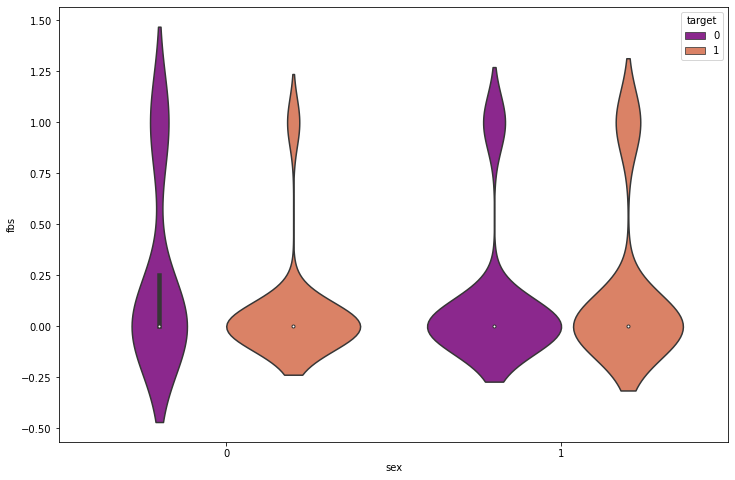

In [11]:
# Between sex and blood sugar

plt.figure(figsize=[12, 8])
sns.violinplot(x='sex', y='fbs', data=df, hue='target', palette='plasma')

#### There are few people who have the probability of fasting blood sugar negative meaning that they don't have it as seen from the plot below.

In [12]:
#Correlation of features with respect to target variable

corr_matrix = df.corr()
corr_matrix['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

<AxesSubplot:>

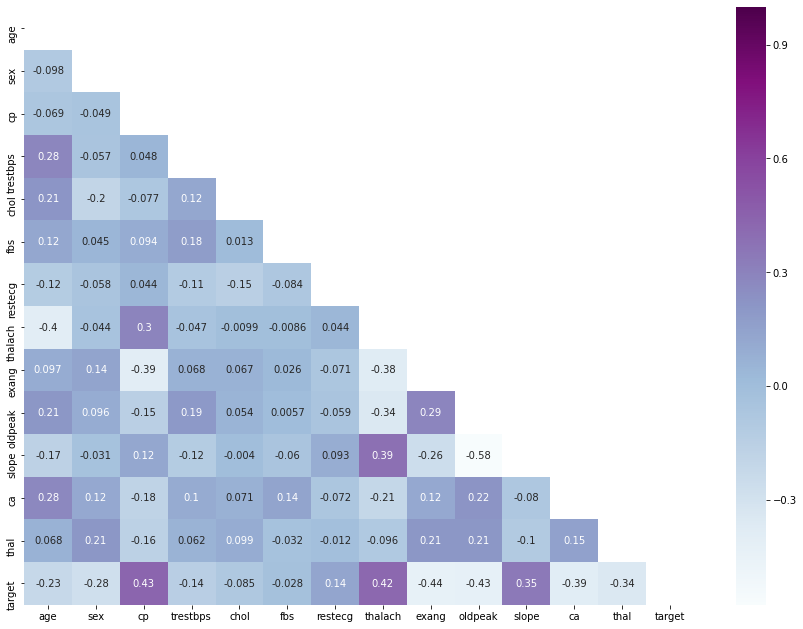

In [13]:
#heatmap
matrix = np.triu(corr_matrix)
plt.figure(figsize=(15, 11))
sns.heatmap(corr_matrix, annot=True, mask=matrix, cmap = 'BuPu')

### How much of each sex?

<AxesSubplot:xlabel='sex', ylabel='count'>

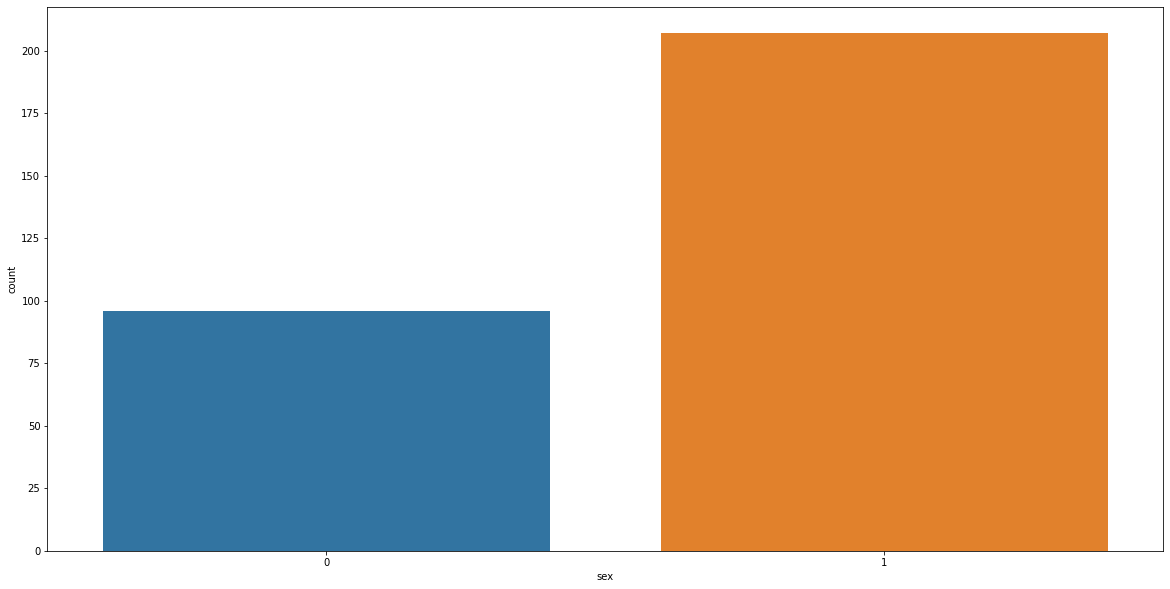

In [15]:
plt.figure(figsize=[20, 10])
sns.countplot(x='sex', data=df)

### Now, the question again, which sex is at advantage?


#### Well, I think each is at some advantage over another. As sex 0 has less no of people in it as compared to sex 1 which have people double than of sex, the overall result is I think neutral. If one has less no of people with less chances of heart attack other has less no of people with more chances of heart attacks.

In [17]:
X = df.drop(['target'], axis=1)
y = df['target']

In [18]:
X.shape

(303, 13)

In [19]:
y.shape

(303,)

In [20]:
# Training and Testing 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2


In [21]:
# Decison Tree 

regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [22]:
regressor.score(x_train , y_train)

1.0

In [28]:
regressor.score(x_test , y_test)

0.20261437908496738

In [35]:
yTreePre = regressor.predict(x_test)

In [38]:
r2Tree = r2_score(y_test ,yTreePre)
r2Tree

0.20261437908496738

In [30]:
# Random Forest Regressor

rf = RandomForestRegressor()
rf.fit(x_train , y_train)

RandomForestRegressor()

In [31]:
rf.score(x_train , y_train)

0.9212405749260711

In [32]:
rf.score(x_test , y_test)

0.5300474945533769

In [33]:
yRandomPre =rf.predict(x_test)

In [39]:
r2Random = r2_score(y_test , yRandomPre)
r2Random

0.5300474945533769

In [23]:
import statsmodels.api as sm
from scipy import stats 
m = sm.add_constant(X)
est=sm.OLS(y,m)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     23.85
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           1.49e-38
Time:                        03:51:45   Log-Likelihood:                -108.28
No. Observations:                 303   AIC:                             244.6
Df Residuals:                     289   BIC:                             296.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8289      0.293      2.830      0.0

### Conclusion:

#### we can see that sex 0 has less number of patients when compared to sex 1
#### most common type of chest pain that happens between patients is type 0
#### There are few people who have the probability of fasting blood sugar negative